# Exploratory Data Analysis

## Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import OneHotEncoder
from library.sb_utils import save_file

pd.options.display.max_rows = 10

## 1. Load The Data

In [2]:
patient = pd.read_csv('../data/Patient_data_cleaned.csv')

In [3]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84026 entries, 0 to 84025
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   hospital_id                    84026 non-null  int64  
 1   age                            80783 non-null  float64
 2   bmi                            81118 non-null  float64
 3   elective_surgery               84026 non-null  int64  
 4   ethnicity                      82852 non-null  object 
 5   gender                         84013 non-null  object 
 6   height                         82989 non-null  float64
 7   icu_admit_source               83941 non-null  object 
 8   icu_stay_type                  84026 non-null  object 
 9   icu_type                       84026 non-null  object 
 10  pre_icu_los_days               84026 non-null  float64
 11  weight                         81699 non-null  float64
 12  apache_2_diagnosis             83262 non-null 

In [4]:
patient.head(3)

,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death,AgeGroup
0,118,68.0,22.73,0,Caucasian,M,180.3,Floor,admit,CTICU,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0,60-80
1,81,77.0,27.42,0,Caucasian,F,160.0,Floor,admit,Med-Surg ICU,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0,60-80
2,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,admit,Med-Surg ICU,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0,20-40


## 2. Data Spliting

### 2.1 Numerical data

In [5]:
##Selecting numerical features
numerical_data = patient.select_dtypes(include='number')
#append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 74 numerical features: 

['hospital_id', 'age', 'bmi', 'elective_surgery', 'height', 'pre_icu_los_days', 'weight', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'heart_rate_apache', 'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache', 'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min', 'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min', 'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min', 'h1_mbp_noninvasive_max', 'h1_mbp_noninvas

### 2.2 Categorical data

In [6]:
#Selecting categoricalfeatures
categorical_data=patient.select_dtypes(include= 'object')
#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} numerical features:', '\n')
print(categorical_features)

There are 8 numerical features: 

['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem', 'AgeGroup']


## 3. Descriptive Analysis

### 3.1 Summary statistics of Numerical Features

#### 3.1.1 Glance of the statistics

In [7]:
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
hospital_id,84026.0,106.395711,62.689839,2.000000,50.00000,112.000000,166.000000,204.00000
age,80783.0,62.318099,16.791083,16.000000,52.00000,65.000000,75.000000,89.00000
bmi,81118.0,29.169141,8.268193,14.844926,23.64335,27.623457,32.898025,67.81499
elective_surgery,84026.0,0.185681,0.388851,0.000000,0.00000,0.000000,0.000000,1.00000
height,82989.0,169.630803,10.794858,137.200000,162.50000,170.100000,177.800000,195.59000
...,...,...,...,...,...,...,...,...
immunosuppression,84026.0,0.026266,0.159925,0.000000,0.00000,0.000000,0.000000,1.00000
leukemia,84026.0,0.006974,0.083219,0.000000,0.00000,0.000000,0.000000,1.00000
lymphoma,84026.0,0.004118,0.064038,0.000000,0.00000,0.000000,0.000000,1.00000
solid_tumor_with_metastasis,84026.0,0.020684,0.142325,0.000000,0.00000,0.000000,0.000000,1.00000


#### 3.1.2 Check the unique value counts of each feature

In [8]:
numerical_data.nunique()

hospital_id                      147
age                               74
bmi                            33145
elective_surgery                   2
height                           391
                               ...  
immunosuppression                  2
leukemia                           2
lymphoma                           2
solid_tumor_with_metastasis        2
hospital_death                     2
Length: 74, dtype: int64

Although all the data is numerical but from the unique value of each features we can easily infer that a lot of the numerical features actually are categorical data.Some of them are binary variables, including our target variable: hospital_death.

#### 3.1.3 Skew in numerical features

In [9]:
numerical_data.skew()

hospital_id                    -0.069135
age                            -0.626905
bmi                             1.448770
elective_surgery                1.616695
height                         -0.101258
                                 ...    
immunosuppression               5.924586
leukemia                       11.849098
lymphoma                       15.487492
solid_tumor_with_metastasis     6.735660
hospital_death                  3.065106
Length: 74, dtype: float64

Although I already omitted the outlier, there are some features that are still supper skewed. Such as the gcs_unable_apache, aids, hepatic_failure, immunosuppression, leukemia , lymphoma, cirrhosis , solid_tumor_with_metastasis , arf_apache etc. But most of these skewed features are categorical features. The continuous variables are not that skewed which is good.

#### 3.1.4 Distributions of numerical features

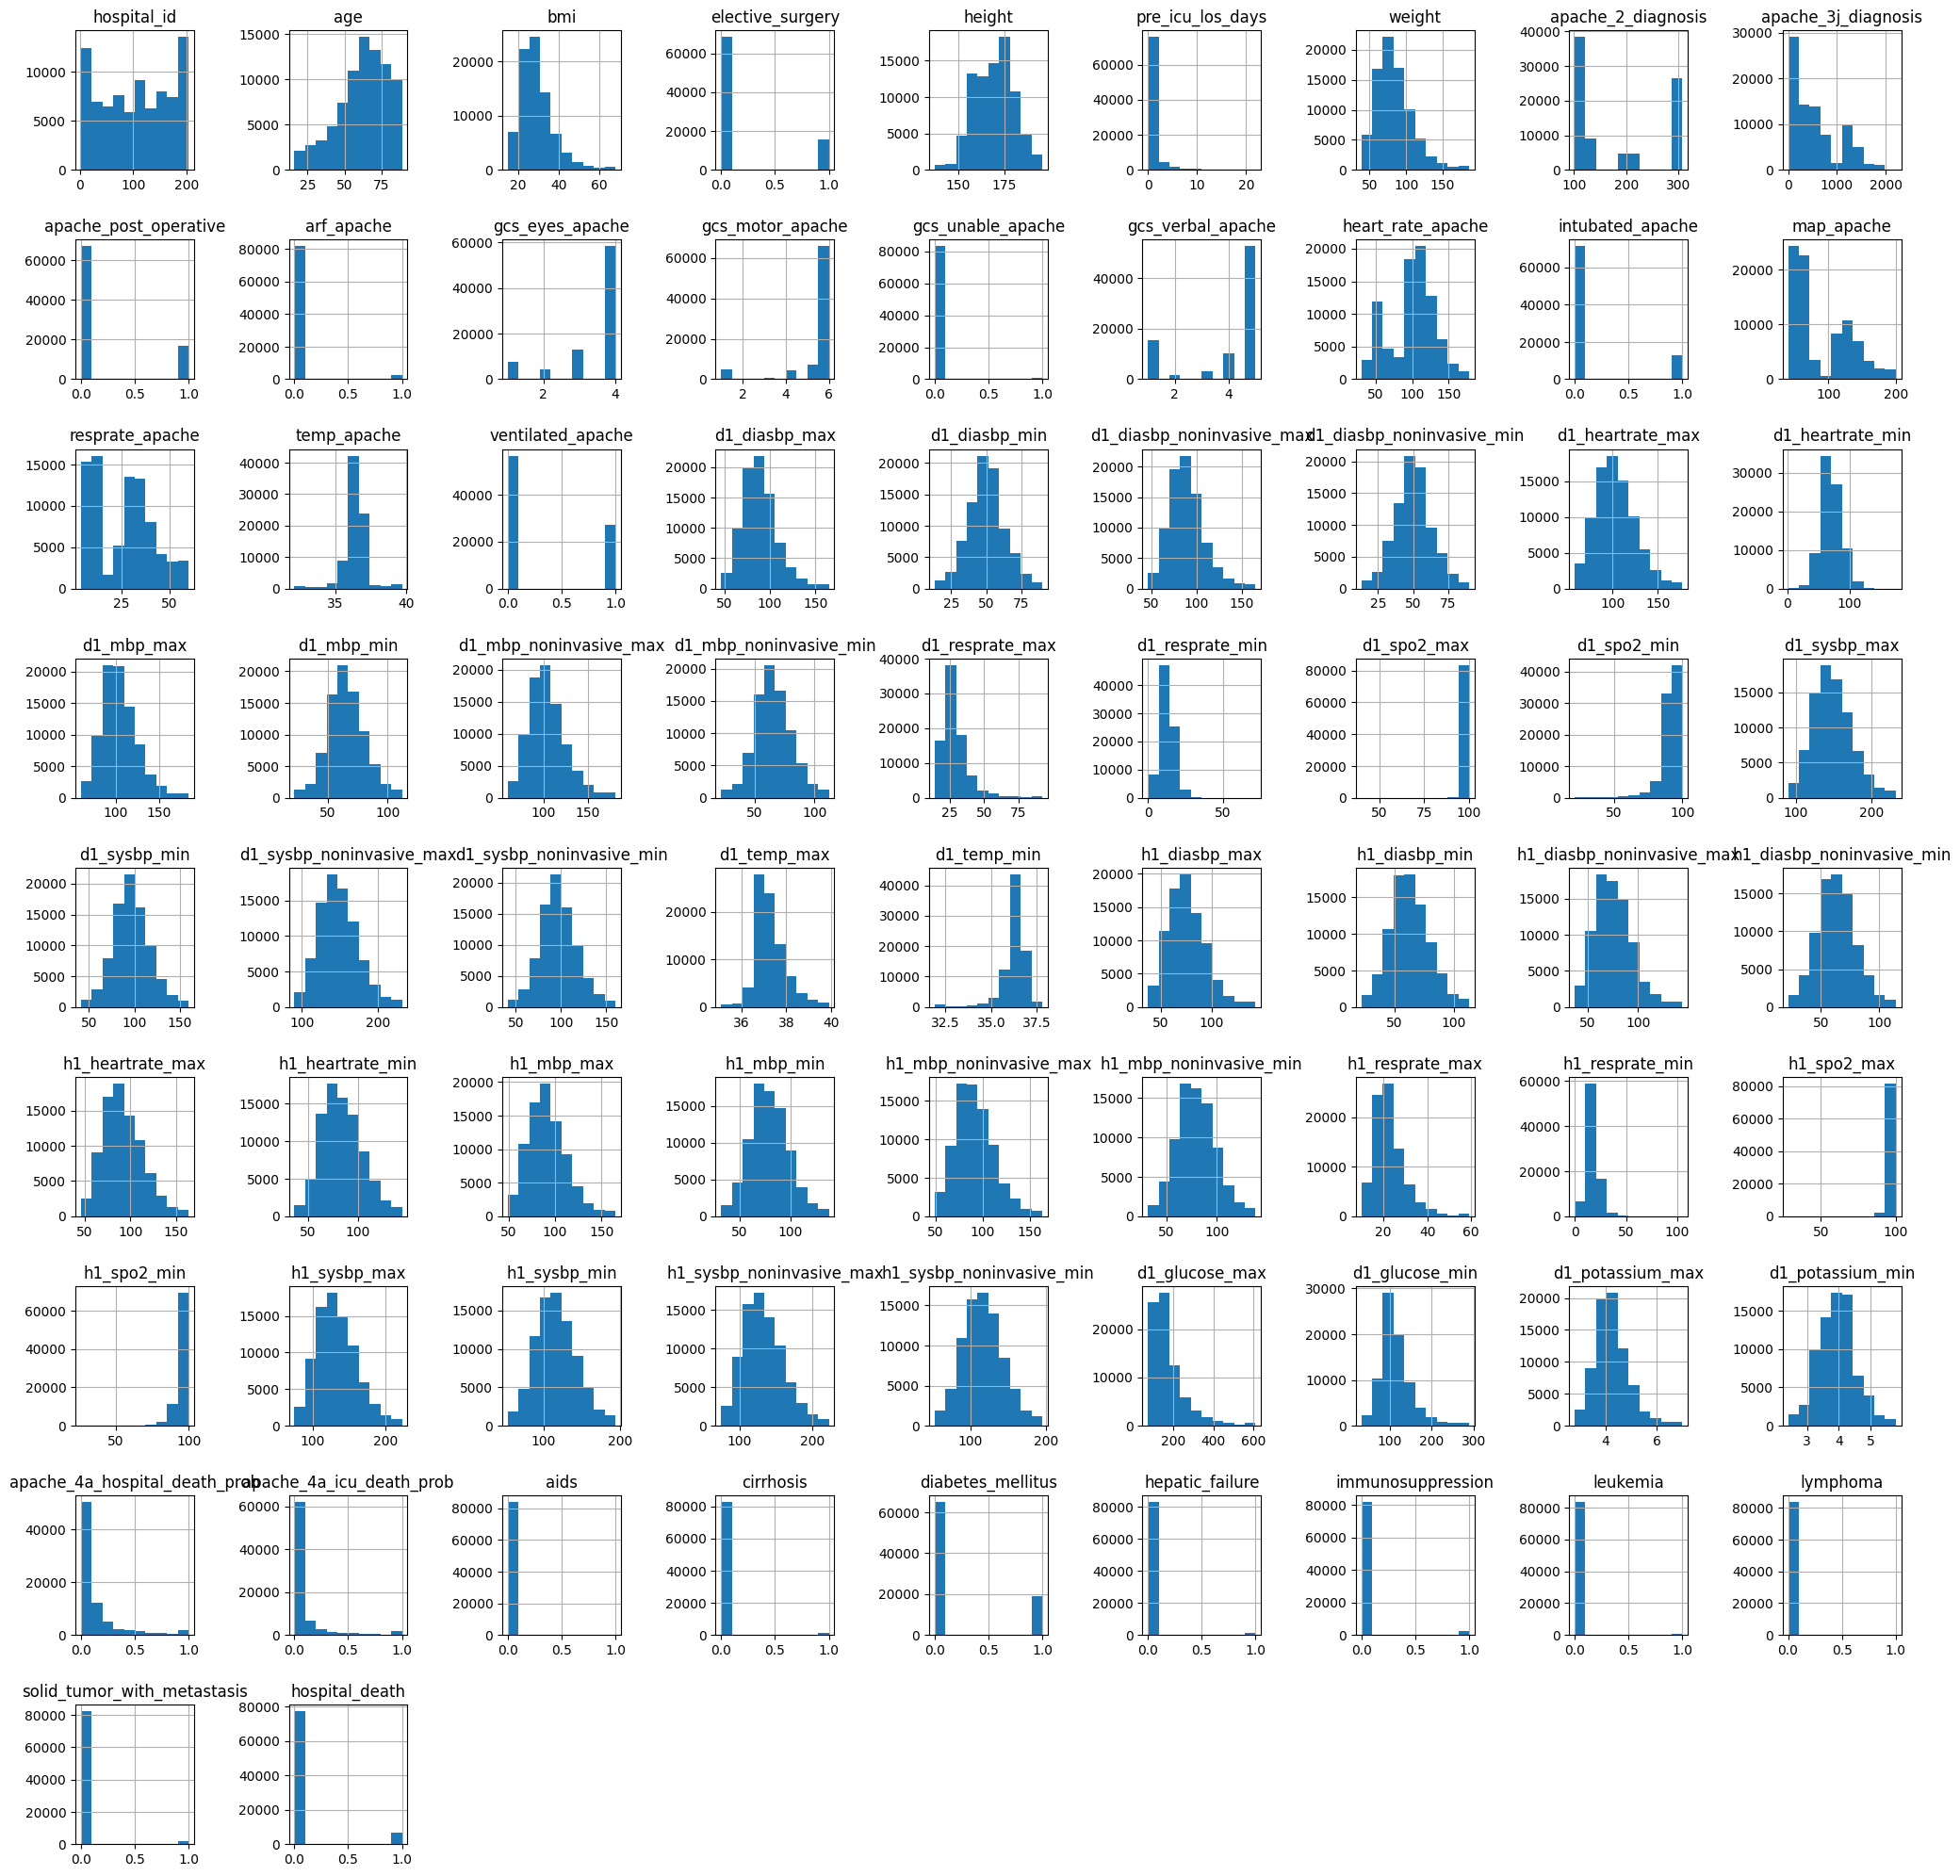

In [10]:
numerical_data.hist(figsize=(25,25))
plt.subplots_adjust(wspace=0.8,hspace=0.5);

#### 3.1.5 Density plots of numerical features

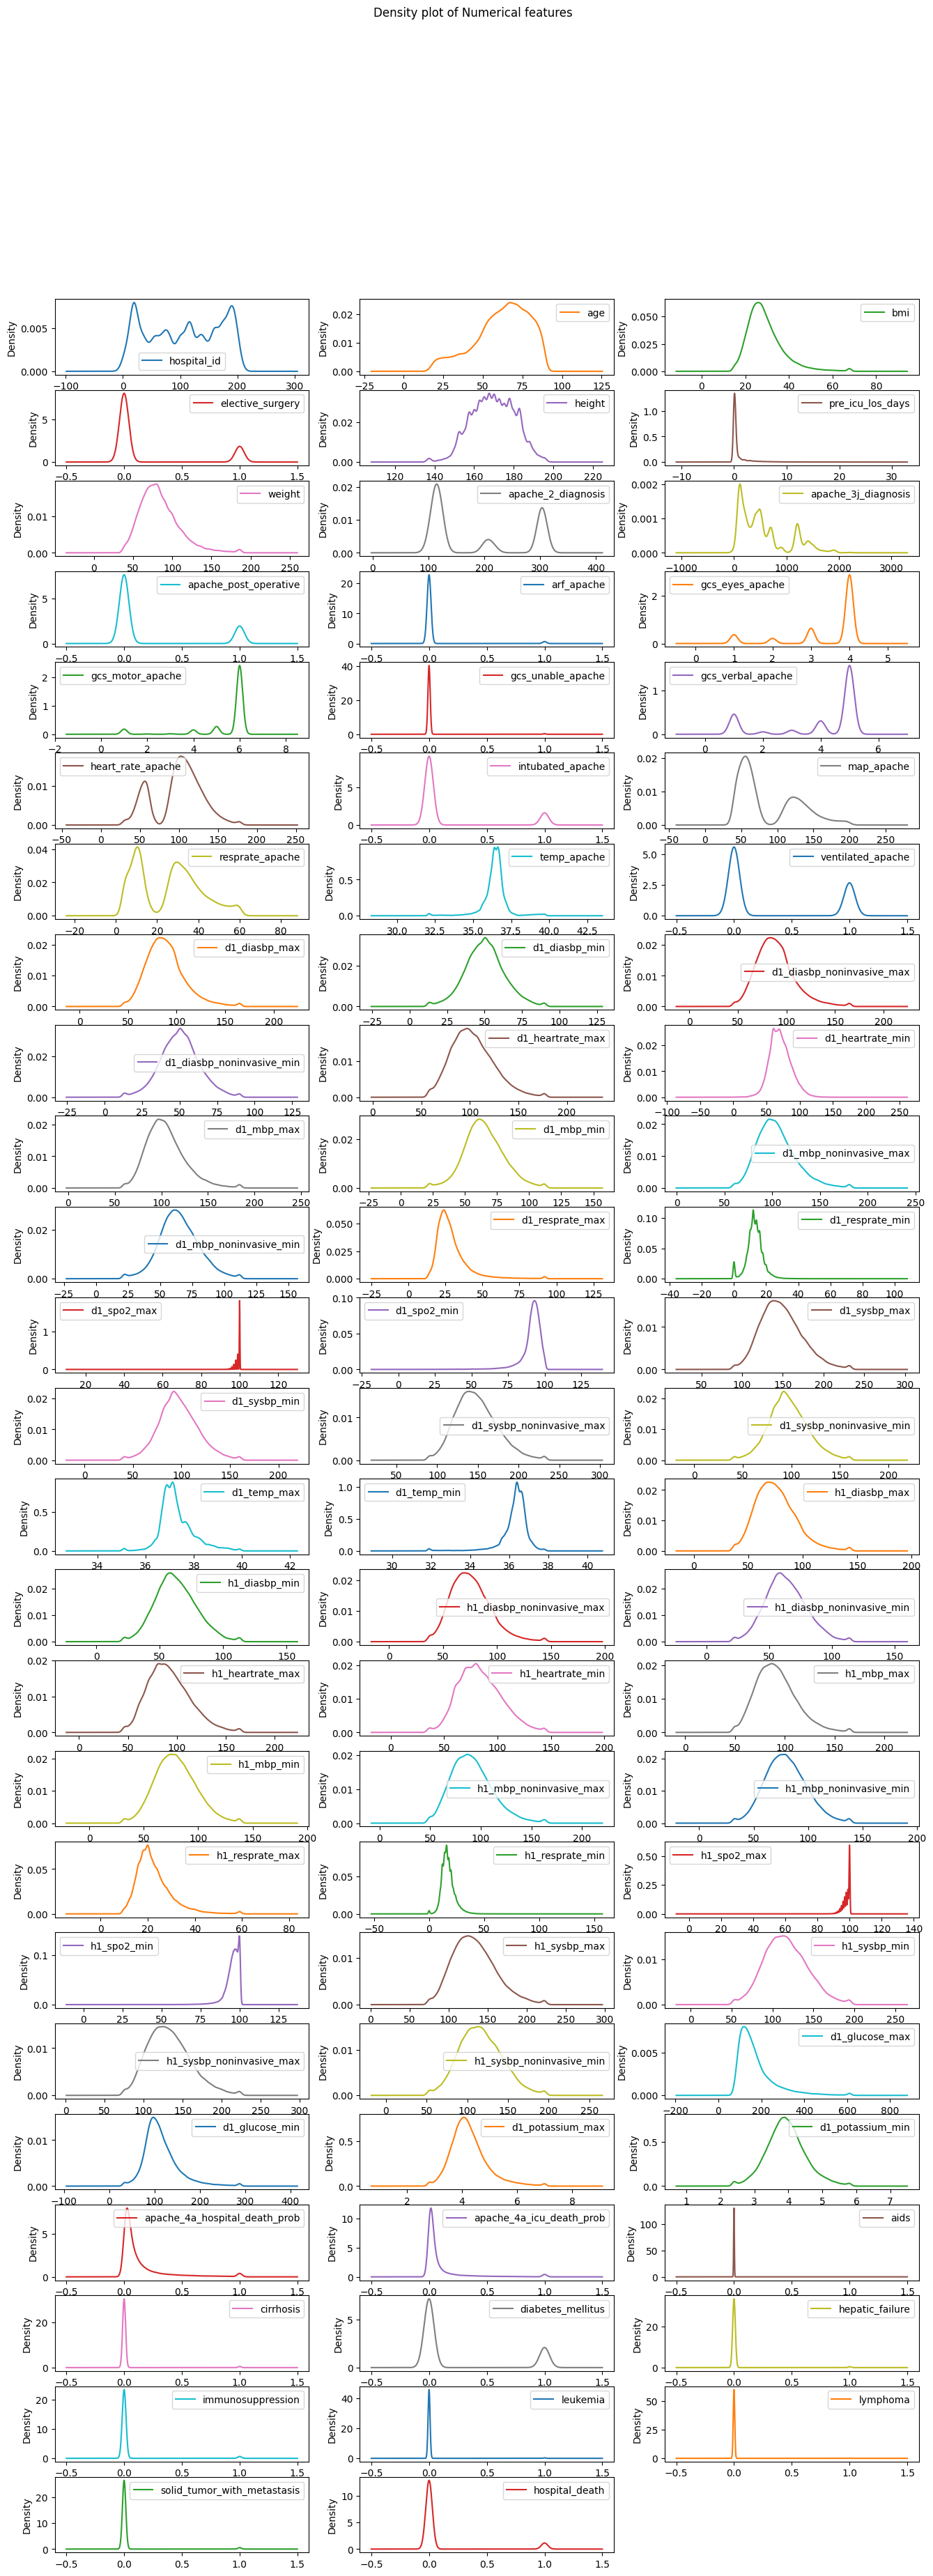

In [11]:
numerical_data.plot(kind='density',figsize=(16,42),subplots=True,layout=(25,3),title="Density plot of Numerical features",sharex=False)
plt.show()

Most of the continuous variables are approximately normal distributed which is good.

#### 3.1.6 Variance of each numerical features

In [10]:
numerical_data.var()

hospital_id                    3930.015860
age                             281.940467
bmi                              68.363021
elective_surgery                  0.151205
height                          116.528963
                                  ...     
immunosuppression                 0.025576
leukemia                          0.006925
lymphoma                          0.004101
solid_tumor_with_metastasis       0.020256
hospital_death                    0.074658
Length: 74, dtype: float64

Some of the data have high variance which means they may lead overfitting of models. Models with high variance may fit the training data very well but fail to perform well on new, unseen data due to their inability to generalize beyond the specific training set. So I need to normalize the data before build the model. The variance of 'aids','leukemia' and 'lymphoma' are relatively low, and they are the most skwed variables, so we might need to drop these columns. Let's look into these three features to decide whether to drop them or keep them. The hospital id might have some impact on the deathrate since it could associate with the location of the hospital. Hospital in different location may have different ability due to different of doctors and equipment. But in this project we just ignore this impact. So, I will drop the hospital id column.

In [11]:
Patient_cleaned=patient.drop('hospital_id', axis=1)

#### 3.1.7  Check features that have low variance and are most skwed

Correlation between features and target variabel:

In [12]:
df=numerical_data[['aids','leukemia','lymphoma','hospital_death']]
correlation_matrix = df.corr()
correlation_matrix

,aids,leukemia,lymphoma,hospital_death
aids,1.000000,-0.002454,0.023523,0.006177
leukemia,-0.002454,1.000000,0.032576,0.027939
lymphoma,0.023523,0.032576,1.000000,0.018966
hospital_death,0.006177,0.027939,0.018966,1.000000


All these features have low correlation with our target variable.

Let's check the deathrate by features to see if there are difference.

In [13]:
#Define the function:
def deathrate(col_name,data=patient):
    death_by_col= data[data.hospital_death==1][col_name].value_counts()
    deathrate_by_col = death_by_col/data[col_name].value_counts()
    return deathrate_by_col

Deathrate by aids:

In [14]:
df.aids.value_counts()

aids
0.0    83954
1.0       72
Name: count, dtype: int64

In [15]:
deathrate('aids',numerical_data)

aids
0.0    0.081211
1.0    0.138889
Name: count, dtype: float64

death_by_leukemia：

In [16]:
df.leukemia.value_counts()

leukemia
0.0    83440
1.0      586
Name: count, dtype: int64

In [17]:
deathrate('leukemia',numerical_data)

leukemia
0.0    0.080621
1.0    0.172355
Name: count, dtype: float64

death_by_lymphoma：

In [18]:
df.lymphoma.value_counts()

lymphoma
0.0    83680
1.0      346
Name: count, dtype: int64

In [19]:
deathrate('lymphoma',numerical_data)

lymphoma
0.0    0.080927
1.0    0.161850
Name: count, dtype: float64

We can see that althrough all these features have a low correlation with our target variable, but they do have big impact on the deathrate of the paitent. So we'd better to keep them in our model.

### 3.2 Summary statistics of Categorical Features

#### 3.2.1 Glance of the statistics of the Categorical Features

In [20]:
categorical_data.describe(include='object').T

,count,unique,top,freq
ethnicity,82852,6,Caucasian,64792
gender,84013,2,M,45357
icu_admit_source,83941,5,Accident & Emergency,49878
icu_stay_type,84026,3,admit,79103
icu_type,84026,8,Med-Surg ICU,46058
apache_3j_bodysystem,83262,11,Cardiovascular,27348
apache_2_bodysystem,83262,9,Cardiovascular,35717
AgeGroup,80783,5,60-80,36435


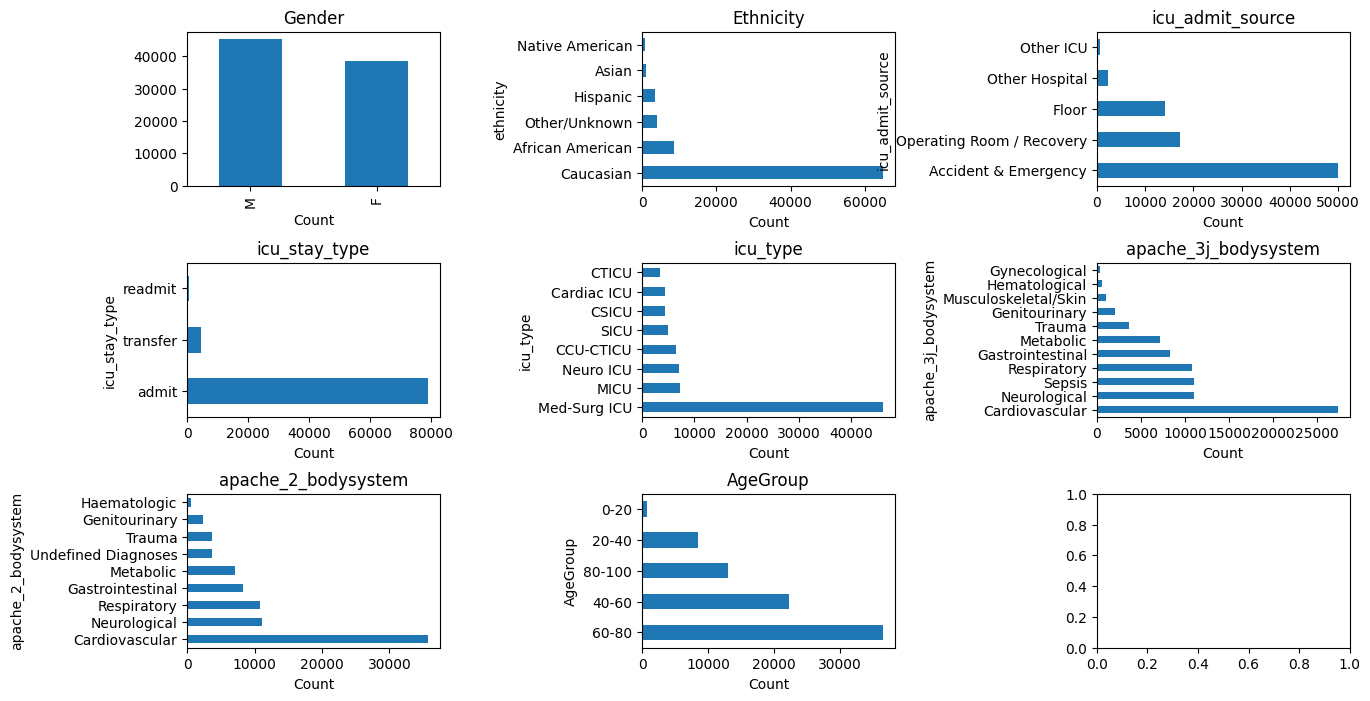

In [21]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))

#Gender
categorical_data.gender.value_counts().plot(kind='bar', ax=ax[0,0])
ax[0,0].set_title('Gender')
ax[0,0].set_xlabel('Count')
#Ethnicity
categorical_data.ethnicity.value_counts().plot(kind='barh', ax=ax[0,1])
ax[0,1].set_title('Ethnicity')
ax[0,1].set_xlabel('Count')
#icu_admit_source
categorical_data.icu_admit_source.value_counts().plot(kind='barh', ax=ax[0,2])
ax[0,2].set_title('icu_admit_source')
ax[0,2].set_xlabel('Count')
#icu_stay_type
categorical_data.icu_stay_type.value_counts().plot(kind='barh', ax=ax[1,0])
ax[1,0].set_title('icu_stay_type')
ax[1,0].set_xlabel('Count')
#icu_type
categorical_data.icu_type.value_counts().plot(kind='barh', ax=ax[1,1])
ax[1,1].set_title('icu_type')
ax[1,1].set_xlabel('Count')

categorical_data.apache_3j_bodysystem.value_counts().plot(kind='barh', ax=ax[1,2])
ax[1,2].set_title('apache_3j_bodysystem')
ax[1,2].set_xlabel('Count')

categorical_data.apache_2_bodysystem.value_counts().plot(kind='barh', ax=ax[2,0])
ax[2,0].set_title('apache_2_bodysystem')
ax[2,0].set_xlabel('Count')

categorical_data.AgeGroup.value_counts().plot(kind='barh', ax=ax[2,1])
ax[2,1].set_title('AgeGroup')
ax[2,1].set_xlabel('Count')
#Give the subplots a little "breathing room" with a wspace of 0.8
plt.subplots_adjust(wspace=0.8,hspace=0.5)

#### 3.2.2 Categorical features VS. Target

In [22]:
import copy
df1=categorical_data.copy()
df1['hospital_death']=patient['hospital_death']

In [23]:
for col in categorical_data.columns:
    print(deathrate(col,df1))
    

ethnicity
African American    0.071239
Asian               0.077897
Caucasian           0.082510
Hispanic            0.092342
Native American     0.086898
Other/Unknown       0.077337
Name: count, dtype: float64
gender
M    0.079899
F    0.082756
Name: count, dtype: float64
icu_admit_source
Accident & Emergency         0.082401
Floor                        0.126212
Operating Room / Recovery    0.034241
Other Hospital               0.127099
Other ICU                    0.124314
Name: count, dtype: float64
icu_stay_type
admit       0.080553
transfer    0.093101
readmit     0.087838
Name: count, dtype: float64
icu_type
CCU-CTICU       0.068538
CSICU           0.051410
CTICU           0.055666
Cardiac ICU     0.096105
MICU            0.114889
Med-Surg ICU    0.082982
Neuro ICU       0.077326
SICU            0.069478
Name: count, dtype: float64
apache_3j_bodysystem
Cardiovascular          0.073936
Gastrointestinal        0.068891
Genitourinary           0.055528
Gynecological           0.00

The apache_3j_bodysystem and apache_2_bodysystem share most of their values, so I only need to keep one of them, in this case I will choose to keep apache_3j_bodysystem, since it have a value 'Sepsis' that have the highest death rate.

In [24]:
categorical_data=categorical_data.drop('apache_2_bodysystem', axis=1)
Patient_cleaned=Patient_cleaned.drop('apache_2_bodysystem', axis=1)

## 4. Categorical data encoding

### 4.1 one hot encoding

In [25]:
cat_encoded = pd.get_dummies(categorical_data)

In [26]:
#merge the dataset
patient_onehot_encoded=pd.concat([numerical_data, cat_encoded], axis=1)
#move target to the last col
column_to_move = patient_onehot_encoded['hospital_death']
patient_onehot_encoded = patient_onehot_encoded.drop('hospital_death', axis=1)
patient_onehot_encoded['hospital_death'] = column_to_move
patient_onehot_encoded.head(3)

,hospital_id,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,...,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,AgeGroup_0-20,AgeGroup_20-40,AgeGroup_40-60,AgeGroup_60-80,AgeGroup_80-100,hospital_death
0,118,68.0,22.73,0,180.3,0.541667,73.9,113.0,502.01,0,...,False,False,True,False,False,False,False,True,False,0
1,81,77.0,27.42,0,160.0,0.927778,70.2,108.0,203.01,0,...,False,True,False,False,False,False,False,True,False,0
2,118,25.0,31.95,0,172.7,0.000694,95.3,122.0,703.03,0,...,False,False,False,False,False,True,False,False,False,0


### 4.2 Label encoding 

In [27]:
cat_label_encoded=categorical_data.copy()
from sklearn.preprocessing import LabelEncoder

columns_list= categorical_data.columns.tolist()
label_encoder = LabelEncoder()
# Apply label encoding to each column in the list
for column in columns_list:
    cat_label_encoded[column + '_encoded'] = label_encoder.fit_transform(categorical_data[column])
cat_label_encoded=cat_label_encoded.drop(columns_list,axis=1)

In [28]:
#merge the dataset
patient_label_encoded=pd.concat([numerical_data, cat_label_encoded], axis=1)
#move target to the last col
column_to_move = patient_label_encoded['hospital_death']
patient_label_encoded = patient_label_encoded.drop('hospital_death', axis=1)
patient_label_encoded['hospital_death'] = column_to_move
patient_label_encoded.head(3)

,hospital_id,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,...,lymphoma,solid_tumor_with_metastasis,ethnicity_encoded,gender_encoded,icu_admit_source_encoded,icu_stay_type_encoded,icu_type_encoded,apache_3j_bodysystem_encoded,AgeGroup_encoded,hospital_death
0,118,68.0,22.73,0,180.3,0.541667,73.9,113.0,502.01,0,...,0.0,0.0,2,1,1,0,2,9,3,0
1,81,77.0,27.42,0,160.0,0.927778,70.2,108.0,203.01,0,...,0.0,0.0,2,0,1,0,5,8,3,0
2,118,25.0,31.95,0,172.7,0.000694,95.3,122.0,703.03,0,...,0.0,0.0,2,0,0,0,5,5,1,0


## 5. Correlation Analysis

### 5.1 Using onehot encoded data

In [29]:
# Generating correlation coefficient between each features using onehot encoded data
correlation=patient_onehot_encoded.corr(method='pearson')
correlation

,hospital_id,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,...,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,AgeGroup_0-20,AgeGroup_20-40,AgeGroup_40-60,AgeGroup_60-80,AgeGroup_80-100,hospital_death
hospital_id,1.000000,-0.010784,0.013467,0.051452,0.028987,-0.002743,0.027484,0.008991,0.030057,0.053761,...,-0.035910,-0.022133,-0.011371,0.021367,0.000459,0.005068,0.003149,0.005486,-0.011436,-0.005258
age,-0.010784,1.000000,-0.085381,0.066467,-0.109750,0.070623,-0.125806,0.023802,-0.057563,0.058527,...,-0.007061,0.025470,0.054974,-0.086602,-0.246532,-0.651862,-0.396314,0.383951,0.565545,0.109544
bmi,0.013467,-0.085381,1.000000,0.016904,-0.055914,0.001431,0.877150,0.026993,-0.007108,0.015998,...,-0.027718,0.020937,-0.003563,-0.049812,-0.042307,-0.004992,0.114594,0.047315,-0.131745,-0.033643
elective_surgery,0.051452,0.066467,0.016904,1.000000,0.022852,0.167345,0.027512,0.368495,0.776314,0.909591,...,-0.034724,-0.069713,-0.184859,-0.035519,-0.021731,-0.065248,-0.020989,0.092498,-0.021380,-0.092504
height,0.028987,-0.109750,-0.055914,0.022852,1.000000,-0.014016,0.392503,0.000111,0.014980,0.024397,...,-0.012990,-0.026623,-0.030205,0.042966,-0.005727,0.040292,0.088168,0.010941,-0.102833,-0.018935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AgeGroup_20-40,0.005068,-0.651862,-0.004992,-0.065248,0.040292,-0.043909,0.011290,-0.040052,0.049706,-0.053566,...,0.004916,-0.024428,-0.034966,0.095970,-0.030645,1.000000,-0.199951,-0.291706,-0.142695,-0.058502
AgeGroup_40-60,0.003149,-0.396314,0.114594,-0.020989,0.088168,-0.035813,0.145133,0.013458,-0.000047,-0.024530,...,0.014712,-0.003766,-0.025218,-0.015899,-0.055129,-0.199951,1.000000,-0.524775,-0.256706,-0.060960
AgeGroup_60-80,0.005486,0.383951,0.047315,0.092498,0.010941,0.047839,0.046234,0.050476,0.008906,0.085354,...,-0.016955,0.028041,0.007550,-0.066405,-0.080427,-0.291706,-0.524775,1.000000,-0.374505,0.020942
AgeGroup_80-100,-0.011436,0.565545,-0.131745,-0.021380,-0.102833,0.022997,-0.165683,-0.030825,-0.043345,-0.020195,...,0.004226,-0.004247,0.036059,0.001783,-0.039343,-0.142695,-0.256706,-0.374505,1.000000,0.072099


### 5.2 Using label encoded data

In [30]:
# Generating correlation coefficient between each features using label encoded data
correlation=patient_label_encoded.corr(method='pearson')
correlation

,hospital_id,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,...,lymphoma,solid_tumor_with_metastasis,ethnicity_encoded,gender_encoded,icu_admit_source_encoded,icu_stay_type_encoded,icu_type_encoded,apache_3j_bodysystem_encoded,AgeGroup_encoded,hospital_death
hospital_id,1.000000,-0.010784,0.013467,0.051452,0.028987,-0.002743,0.027484,0.008991,0.030057,0.053761,...,0.002479,-0.004756,-0.017911,0.012067,0.007684,-0.004810,-0.078751,-0.047329,-0.011861,-0.005258
age,-0.010784,1.000000,-0.085381,0.066467,-0.109750,0.070623,-0.125806,0.023802,-0.057563,0.058527,...,0.022160,0.026810,0.018946,-0.026172,0.069036,-0.009351,-0.073140,-0.100506,0.946601,0.109544
bmi,0.013467,-0.085381,1.000000,0.016904,-0.055914,0.001431,0.877150,0.026993,-0.007108,0.015998,...,-0.009267,-0.042407,-0.022546,-0.042029,0.029800,0.000897,-0.025981,-0.039802,-0.126825,-0.033643
elective_surgery,0.051452,0.066467,0.016904,1.000000,0.022852,0.167345,0.027512,0.368495,0.776314,0.909591,...,-0.009198,0.017265,0.019954,0.028308,0.634012,-0.060474,-0.115699,-0.223597,0.032320,-0.092504
height,0.028987,-0.109750,-0.055914,0.022852,1.000000,-0.014016,0.392503,0.000111,0.014980,0.024397,...,0.009490,0.004911,-0.058541,0.681061,0.010876,-0.001117,-0.030493,-0.029036,-0.137297,-0.018935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
icu_stay_type_encoded,-0.004810,-0.009351,0.000897,-0.060474,-0.001117,0.019580,0.000461,-0.023146,-0.032570,-0.059289,...,0.002164,-0.002482,-0.025234,-0.011783,-0.009220,1.000000,0.012745,0.061202,-0.007060,0.010460
icu_type_encoded,-0.078751,-0.073140,-0.025981,-0.115699,-0.030493,-0.022612,-0.038471,-0.012195,0.036034,-0.103087,...,0.001027,0.017201,0.025675,-0.047916,-0.092057,0.012745,1.000000,0.296231,-0.050369,0.016640
apache_3j_bodysystem_encoded,-0.047329,-0.100506,-0.039802,-0.223597,-0.029036,-0.047620,-0.052054,-0.201234,0.011987,-0.253688,...,0.016013,0.041934,-0.004774,-0.057292,-0.169494,0.061202,0.296231,1.000000,-0.072122,0.055044
AgeGroup_encoded,-0.011861,0.946601,-0.126825,0.032320,-0.137297,0.055459,-0.173529,0.003354,-0.065109,0.027183,...,0.015216,0.010536,0.017810,-0.049683,0.035070,-0.007060,-0.050369,-0.072122,1.000000,0.113117


We can see that there are some features that have a very low correlation with our target variable. But some of the features are discontinuous data, so the pearson correlation might not be a good way to determine whether we should keep or drop the feature. 

## 6. Save data

In [31]:
# save the data to a new csv file
datapath = '../data'
save_file(patient_onehot_encoded, 'patient_onehot_encoded.csv', datapath)
save_file(patient_label_encoded, 'patient_label_encoded.csv', datapath)
save_file(Patient_cleaned, 'Patient_data_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../data/patient_onehot_encoded.csv"
A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../data/patient_label_encoded.csv"
A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../data/Patient_data_cleaned.csv"


## 7. Summary

I have done some statistic for the numerical data and categorical data separately. Then to get the data prepared for modeling in the next step, I use both one hot encoding and label encoding to encode all the categorical features into numerical data. Also, I investigated the relation between all the feature and my target variable. 

For now, I only dropped one feature which is apache_2_bodysystem, because it is redundant and there is a better feature contains all apache_2_bodysystem’s information.

I kept all other features for now, not indicating that all these features are useful. I will do different features selection when using different models accordingly. And I believe it’s more reasonable to do so.
